In [1]:
from pyrap.tables import table
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pylab as plt
from matplotlib.colors import LogNorm
import os.path
import time
import seaborn as sns
%matplotlib inline
palette = sns.plt.cm.gray_r
# set masked values to plot red
palette.set_bad('r', 1.0)
%time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.91 µs


In [8]:
MSfile ='1333134985/pks1613-586.1822.ms/'
t = table(MSfile)
A1 = t.getcol("ANTENNA1")
A2 = t.getcol("ANTENNA2")
ant_list = list(set(np.append(A1,A2)))
nants = len(ant_list)
data1 = t.getcol("DATA")
flags = t.getcol("FLAG")
ant1 = 2
ant2 = 3
poln = 0

Successful readonly open of default-locked table 1333134985/pks1613-586.1822.ms/: 23 columns, 18340 rows


In [9]:
#MSfile1 ='../1'
#t = table(MSfile1)

In [10]:
#flags = t.getcol('FLAG')

In [14]:
flag_mask = np.array(flags[(A1==ant1) & (A2==ant2)][:,:,poln])
flag_mask[:,0:200] = 1
flag_mask[:,800:] = 1
data_a = abs(data1[(A1==ant1) & (A2==ant2)][:,:,poln])

In [15]:
real_data = np.ma.array(data_a,mask=flag_mask)

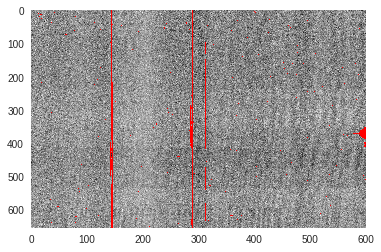

In [17]:
sns.plt.imshow(real_data[:,200:800],cmap=palette,aspect ='auto')
sns.plt.grid(False)

percentage of flags per baseline per time per frequency

What is similiar in my flags and AOflagger and the Machine learning

In [ ]:
sns.plt.figure(figsize=(20,20))
sns.plt.subplots_adjust(wspace=0.25)
sns.plt.subplot(1,2,1)
sns.plt.plot(np.sum(flag_mask[:,200:800],axis=0)/(655.0))
sns.plt.xlabel('Channels')#.shape#/(644.0)
sns.plt.ylabel('percentage of flags')
sns.plt.subplot(1,2,2)
sns.plt.plot(np.sum(flag_mask[:,200:800],axis=1)/(600.0))#.shape#/(644.0)
sns.plt.xlabel('time')#.shape#/(644.0)
sns.plt.ylabel('percentage of flags')

smallest baseline: 3-4
longest baseline:  2-6

In [ ]:
np.sum(flag_mask[:,200:800],axis=0)/(600.0)

In [ ]:
np.array(flag_mask[:,200:800],dtype=int).shape